### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [458]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [433]:
data = pd.read_csv('data/coupons.csv')

In [434]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


### Investigate the dataset for missing or problematic data.

In [435]:
# Calculate the % of data that is missing for each column
data_percent_present = (data.isnull().sum() / data.shape[0] * 100)
data_percent_present

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

In [436]:
for column in ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    print(column + ' Percentage of Values')
    print(data[column].value_counts(dropna=False, normalize=True))
    print('\n')


car Percentage of Values
NaN                                         0.991485
Scooter and motorcycle                      0.001734
Mazda5                                      0.001734
do not drive                                0.001734
crossover                                   0.001656
Car that is too old to install Onstar :D    0.001656
Name: car, dtype: float64


Bar Percentage of Values
never    0.409729
less1    0.274519
1~3      0.194970
4~8      0.084831
gt8      0.027515
NaN      0.008436
Name: Bar, dtype: float64


CoffeeHouse Percentage of Values
less1    0.266872
1~3      0.254257
never    0.233523
4~8      0.140650
gt8      0.087591
NaN      0.017108
Name: CoffeeHouse, dtype: float64


CarryAway Percentage of Values
1~3      0.368338
4~8      0.335699
less1    0.146326
gt8      0.125670
never    0.012062
NaN      0.011905
Name: CarryAway, dtype: float64


RestaurantLessThan20 Percentage of Values
1~3      0.423841
4~8      0.282245
less1    0.165011
gt8      0.101309
neve

99.14% of the data is missing a value for 'car'. Since most of this data is missing, I will drop the 'car' column.

In [437]:
data_cleaned = data.drop(columns=['car'])

In [438]:
unique_rows_with_na = data_cleaned[data_cleaned.isna().any(axis=1)].shape[0]
print(unique_rows_with_na, unique_rows_with_na / data_cleaned.shape[0] * 100)

605 4.769788710186061


Of the remaining 605 rows (4.77%) that contain missing data, they all belong to columns that share the same values. I will replace these values with 'n/a' indicating the value is not available for these rows.

In [439]:
data_cleaned.fillna('n/a', inplace=True)

In [440]:
data_cleaned.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [444]:
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    print(column + ' Percentage of Values')
    print(data_cleaned[column].value_counts(dropna=False, normalize=True))
    print('\n')

Bar Percentage of Values
never    0.409729
less1    0.274519
1~3      0.194970
4~8      0.084831
gt8      0.027515
n/a      0.008436
Name: Bar, dtype: float64


CoffeeHouse Percentage of Values
less1    0.266872
1~3      0.254257
never    0.233523
4~8      0.140650
gt8      0.087591
n/a      0.017108
Name: CoffeeHouse, dtype: float64


CarryAway Percentage of Values
1~3      0.368338
4~8      0.335699
less1    0.146326
gt8      0.125670
never    0.012062
n/a      0.011905
Name: CarryAway, dtype: float64


RestaurantLessThan20 Percentage of Values
1~3      0.423841
4~8      0.282245
less1    0.165011
gt8      0.101309
never    0.017345
n/a      0.010249
Name: RestaurantLessThan20, dtype: float64


Restaurant20To50 Percentage of Values
less1    0.479108
1~3      0.259382
never    0.168401
4~8      0.057395
gt8      0.020814
n/a      0.014901
Name: Restaurant20To50, dtype: float64




In [442]:
data_cleaned.duplicated().sum()

74

There looks to be 74 duplicated rows. This is ok considering our dataset. It is possible for observers to have the same conditions, therefore this is to be expected and tollerated. No action needed

### Rename Columns and Values
I will change the column name 'Y' to 'Accepted' and the values 1 to True and 0 to False for easier readability

In [446]:
data_cleaned.rename(columns={'Y': "Accepted"}, inplace=True)
data_cleaned['Accepted'].replace([1,0], [True, False], inplace=True)
data_cleaned['has_children'].replace([1,0], [True, False], inplace=True)
data_cleaned[['Accepted', 'has_children']].sample(5)

,Accepted,has_children
10260,False,True
6404,True,False
3672,False,False
8953,True,True
12438,True,True


### Validate Output

In [505]:
print(data_cleaned.shape)

for column in data_cleaned.columns:
    print(column + ' Percentage of Values')
    print(data_cleaned[column].value_counts(dropna=False, normalize=True))
    print('\n')

data_cleaned.sample(5)
# data_cleaned.info()

(12684, 25)
destination Percentage of Values
No Urgent Place    0.495348
Home               0.255203
Work               0.249448
Name: destination, dtype: float64


passanger Percentage of Values
Alone        0.575922
Friend(s)    0.260013
Partner      0.084752
Kid(s)       0.079313
Name: passanger, dtype: float64


weather Percentage of Values
Sunny    0.793835
Snowy    0.110769
Rainy    0.095396
Name: weather, dtype: float64


temperature Percentage of Values
80    0.514664
55    0.302744
30    0.182592
Name: temperature, dtype: float64


time Percentage of Values
6PM     0.254652
7AM     0.249448
10AM    0.179360
2PM     0.158389
10PM    0.158152
Name: time, dtype: float64


coupon Percentage of Values
Coffee House             0.315043
Restaurant(<20)          0.219647
Carry out & Take away    0.188663
Bar                      0.159019
Restaurant(20-50)        0.117629
Name: coupon, dtype: float64


expiration Percentage of Values
1d    0.559051
2h    0.440949
Name: expiration, dtyp

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accepted
914,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,31,Unmarried partner,...,never,4~8,n/a,never,1,1,0,0,1,True
5954,Home,Alone,Sunny,80,10PM,Restaurant(<20),2h,Female,21,Married partner,...,less1,1~3,1~3,1~3,1,0,0,1,0,False
825,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Married partner,...,1~3,4~8,1~3,1~3,1,1,1,0,1,False
8658,No Urgent Place,Friend(s),Snowy,30,10AM,Carry out & Take away,1d,Male,41,Single,...,never,1~3,1~3,never,1,1,0,0,1,False
2721,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,1~3,1~3,4~8,1~3,1,1,0,0,1,True


4. What proportion of the total observations chose to accept the coupon? 



### From the data below, 56.84% of observations accepted the coupon.

In [449]:
data_cleaned['Accepted'].value_counts(normalize=True)

True     0.568433
False    0.431567
Name: Accepted, dtype: float64

Text(0, 0.5, 'Count')

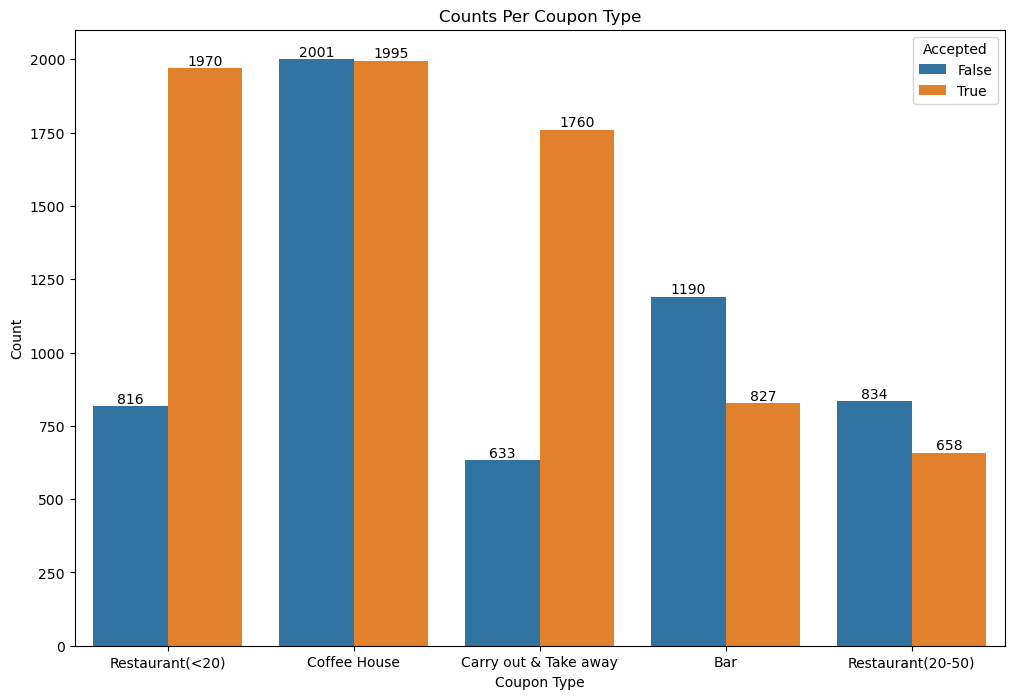

In [450]:
plt.figure(figsize=(12,8))

fig = sns.countplot(data_cleaned, x='coupon', hue='Accepted')
fig.bar_label(container=fig.containers[0])
fig.bar_label(container=fig.containers[1])

plt.title('Counts Per Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')

### Initial Data Exploration

<Axes: xlabel='count', ylabel='occupation'>

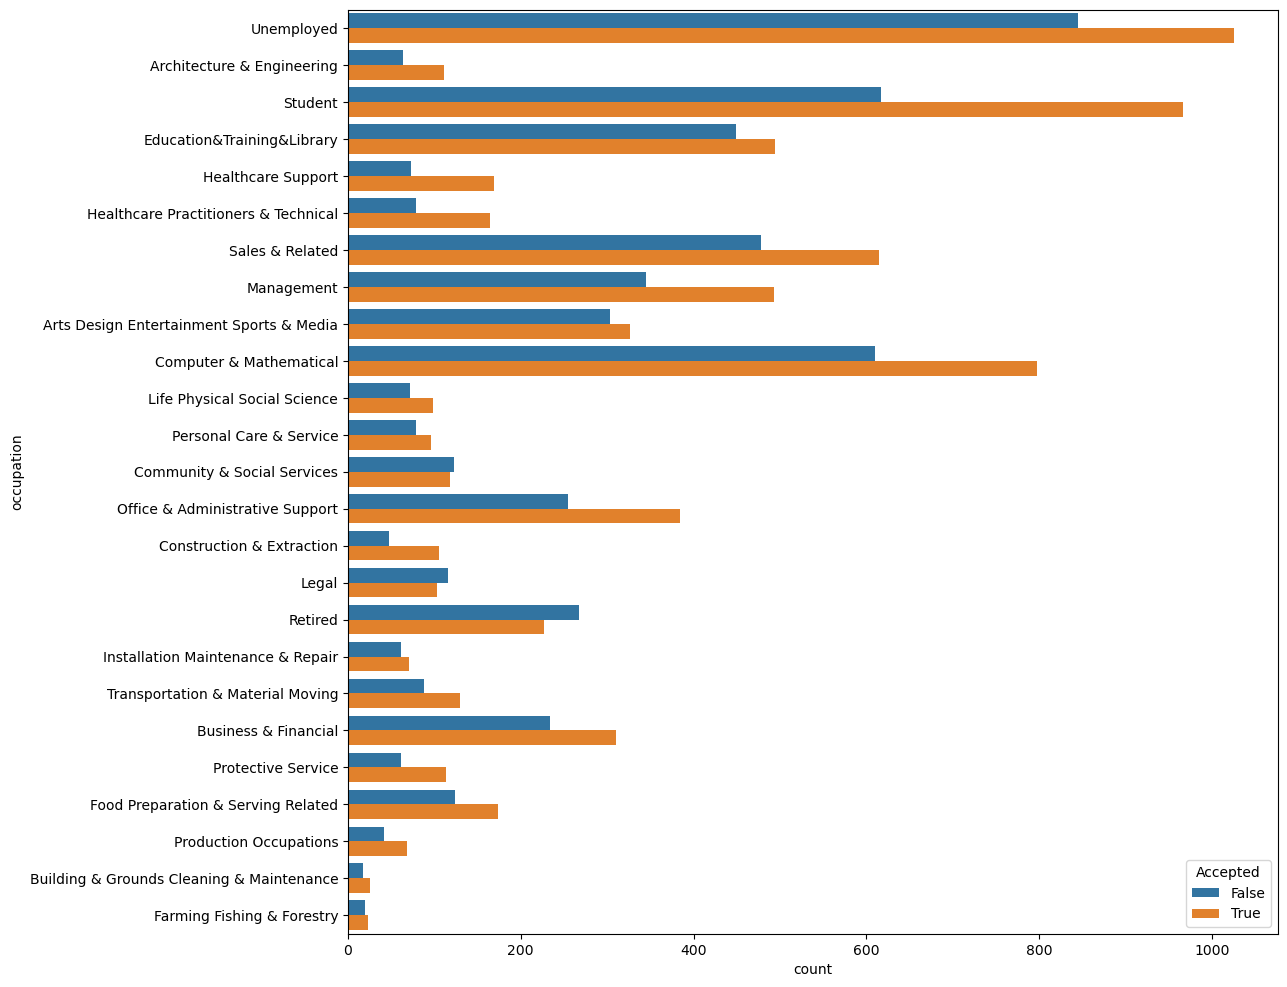

In [469]:
plt.figure(figsize=(12,12))
sns.countplot(data_cleaned, y='occupation', hue='Accepted')

# plt.title('Counts Per Coupon Type')
# plt.xlabel('Coupon Type')
# plt.ylabel('Count')

<Axes: xlabel='count', ylabel='income'>

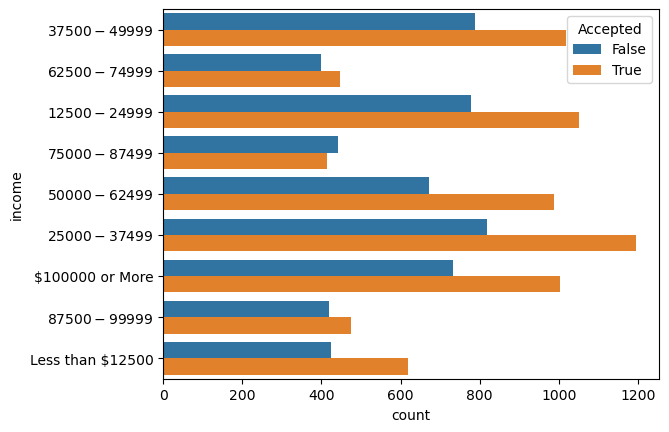

In [453]:
sns.countplot(data_cleaned, y='income', hue='Accepted')

<Axes: xlabel='age', ylabel='count'>

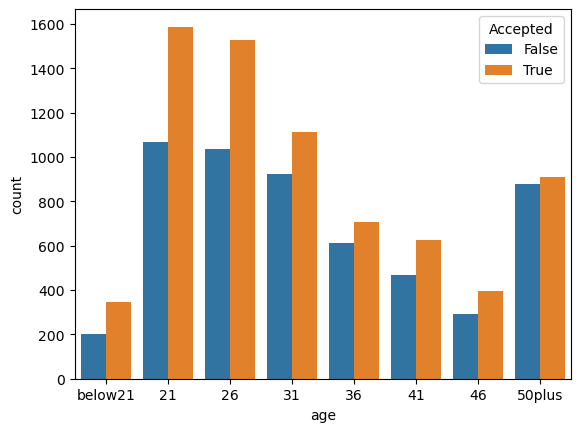

In [481]:
sns.countplot(data_cleaned, x='age', hue='Accepted', order=['below21', '21', '26', '31', '36', '41', '46', '50plus'])

<Axes: xlabel='weather', ylabel='count'>

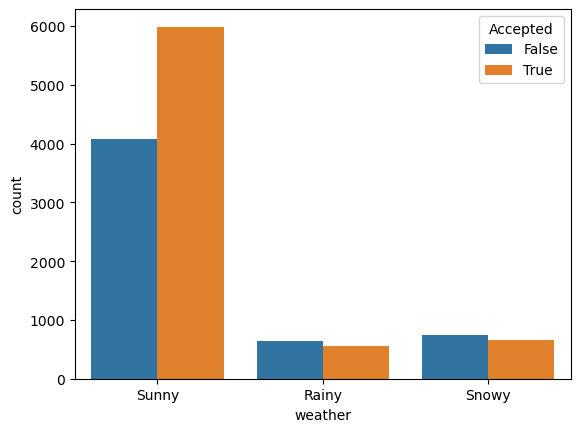

In [478]:
sns.countplot(data_cleaned, x='weather', hue='Accepted')

<Axes: xlabel='count', ylabel='maritalStatus'>

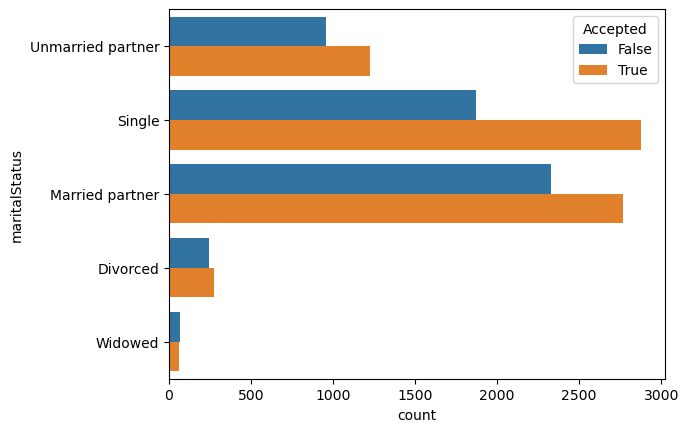

In [410]:
sns.countplot(data_cleaned, y='maritalStatus', hue='Accepted')

<Axes: xlabel='destination', ylabel='count'>

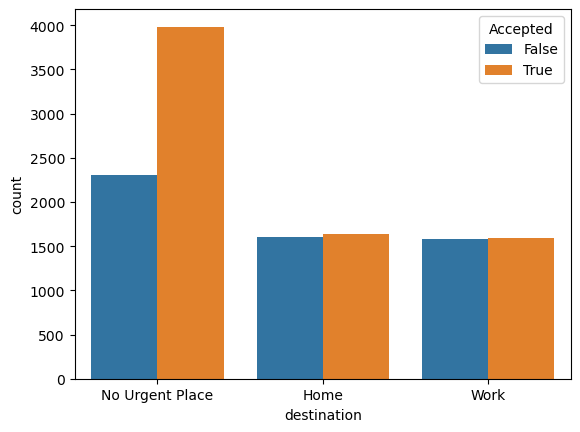

In [477]:
sns.countplot(data_cleaned, x='destination', hue='Accepted')

<Axes: xlabel='time', ylabel='count'>

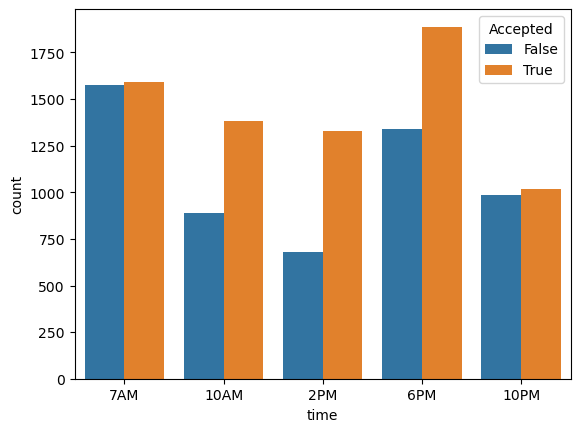

In [476]:
sns.countplot(data_cleaned, x='time', hue='Accepted', order=['7AM', '10AM', '2PM', '6PM', '10PM'])

<Axes: xlabel='temperature', ylabel='count'>

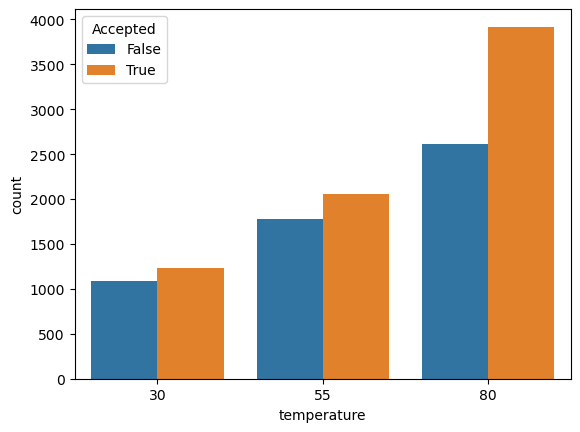

In [475]:
sns.countplot(data_cleaned, x='temperature', hue='Accepted')

<Axes: xlabel='expiration', ylabel='count'>

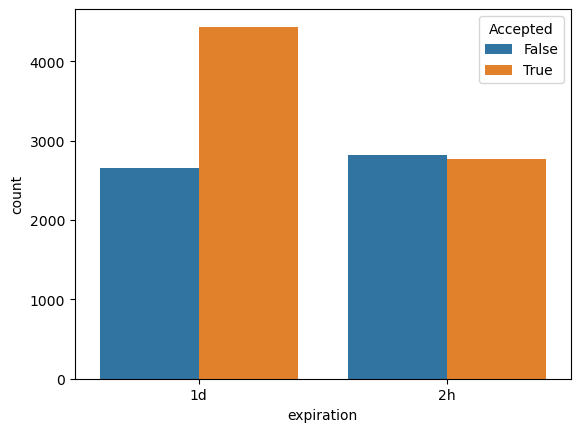

In [474]:
sns.countplot(data_cleaned, x='expiration', hue='Accepted')

<Axes: xlabel='count', ylabel='education'>

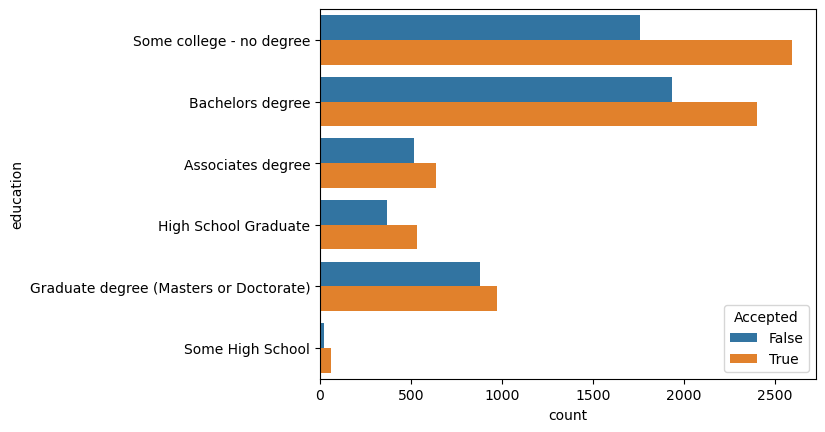

In [415]:
sns.countplot(data_cleaned, y='education', hue='Accepted')

<Axes: xlabel='passanger', ylabel='count'>

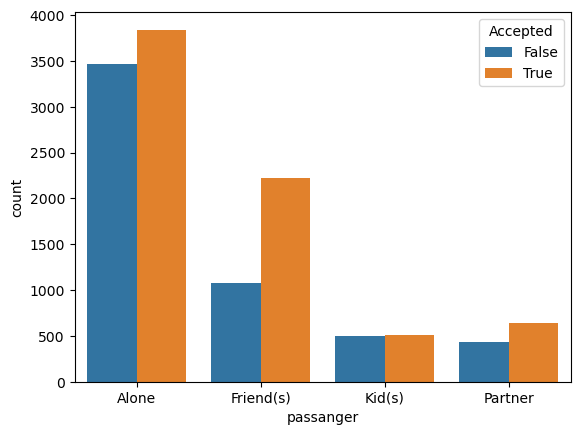

In [473]:
sns.countplot(data_cleaned, x='passanger', hue='Accepted')

<Axes: xlabel='has_children', ylabel='count'>

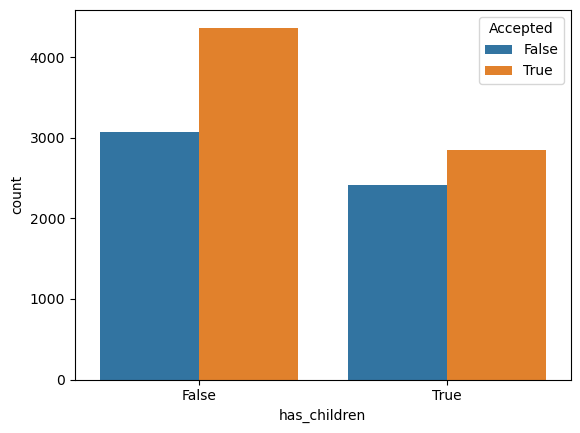

In [472]:
sns.countplot(data_cleaned, x='has_children', hue='Accepted')

## Investigating the Bar Coupons


In [455]:
df_bar = data_cleaned.query('coupon == "Bar"')
print(df_bar.shape)
df_bar.sample(5)

(2017, 25)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accepted
9308,Work,Alone,Sunny,30,7AM,Bar,1d,Male,below21,Single,...,less1,1~3,4~8,4~8,1,1,0,1,0,False
11279,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Single,...,4~8,1~3,1~3,less1,1,1,0,0,1,True
12418,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,31,Married partner,...,less1,4~8,1~3,4~8,1,1,0,0,1,True
7921,Home,Alone,Sunny,80,6PM,Bar,2h,Male,26,Married partner,...,less1,1~3,1~3,1~3,1,0,0,1,0,False
5522,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,50plus,Single,...,less1,less1,less1,1~3,1,0,0,0,1,False


### What proportion of bar coupons were accepted?


In [461]:
df_bar['Accepted'].value_counts(normalize=True)

False    0.589985
True     0.410015
Name: Accepted, dtype: float64

41% of bar coupons were accepted

### Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Accepted     False  True   Sum  Acceptance Rate
bar_visits                                     
3 or fewer    1131   666  1797         0.370618
more than 3     59   161   220         0.731818


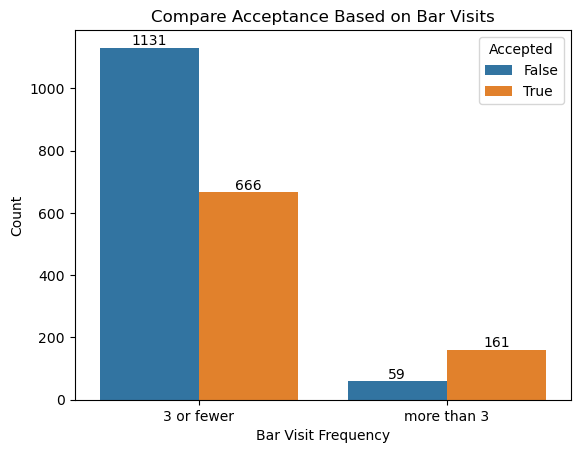

In [492]:
# Remove warning
pd.options.mode.chained_assignment = None

# fn to group Bar Visits
# df_bar['Bar'].value_counts()
def bar_visits(bar):
    if bar in ['never', 'less1', '1~3']:
        return '3 or fewer'
    else:
        return 'more than 3'
    
df_bar['bar_visits'] = df_bar['Bar'].apply(bar_visits)

# Create bar plot with Seaborn
fig = sns.countplot(df_bar, x='bar_visits', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Compare Acceptance Based on Bar Visits')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Count')

# Create contingency table comparing bar_visits to acceptance
ct = pd.crosstab(df_bar['bar_visits'], df_bar['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']
print('================================================')
print(ct)
print('================================================')

In [494]:
count = [666, 161]
nobs = [1797, 220]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 8.530561518715193e-25


### Bar Visits Analysis

#### Question
What are the acceptance rates of those who went to a bar 3 or fewer times a month and those who went more? Compare them.

#### Answer

The acceptance rate of those that went to a bar three or less times per month is 37.06%.
The acceptance rate of those that went to a bar more than three times per month is 73.18%.

Performing a z-test on the data proves statistical significance. Clearly those that frequently go to the bar accepted the coupon more

### Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Accepted              False  True   Sum  Acceptance Rate
bar_visits & age                                        
Age > 25 & Visit > 1    128   292   420         0.695238
All Others             1062   535  1597         0.335003


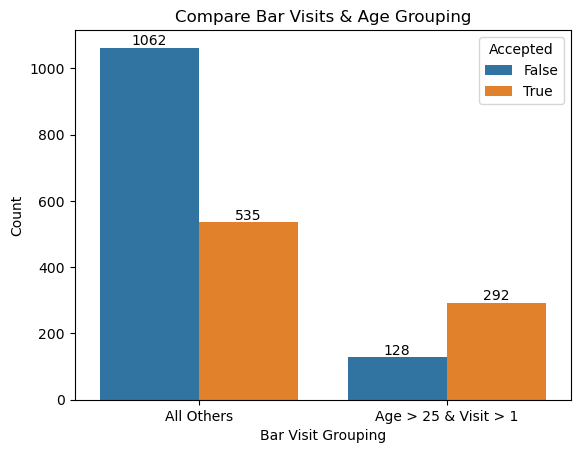

In [500]:
# df_bar['age'].value_counts()

# fn to group the data
def targetGroup(Bar, age):
    # go to a bar more than once a month and are over the age of 25     
    if Bar in ['1~3','4~8', 'gt8'] and age not in ['below21', '21']:
        return 'Age > 25 & Visit > 1'
    else:
        return 'All Others'

df_bar['bar_visits & age'] = df_bar[['Bar', 'age']].apply(lambda x: targetGroup(*x), axis=1)

fig = sns.countplot(df_bar, x='bar_visits & age', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Compare Bar Visits & Age Grouping')
plt.xlabel('Bar Visit Grouping')
plt.ylabel('Count')

# Create table comparing bar_visits to acceptance
ct = pd.crosstab(df_bar['bar_visits & age'], df_bar['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']
print('=====================================================================')
print(ct)
print('=====================================================================')


In [496]:
count = [535, 292]
nobs = [1597, 420]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 1.0868335024199753e-40


###  Analysis

#### Question
Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?

#### Answer
Since the data groups those that go to a bar between 1 and 3 times a month into the same bucket, I am unable to seperate those that go more than once but less than three times from this grouping. Therefore, I will group the '1~3' into my analysis to capture the 2 and 3 timers.

The acceptance rate of those that went to a bar once or more and are over the age of 25 is 69.52%
The acceptance rate of all others is 33.50%.

The z-test above proves statistical significance.

Yes, there is a large difference between these groups. Those 25 and older who frequent the bar scene are fond of the coupon.

### Use the same process as above to compare the acceptance rate between drivers who go to bars more than once a month AND had passengers that were not a kid AND had occupations other than farming, fishing, or forestry. 


Accepted                       False  True   Sum  Acceptance Rate
bar_visits & pax & occupation                                    
All Others                      1021   427  1448         0.294890
Target Group                     169   400   569         0.702988


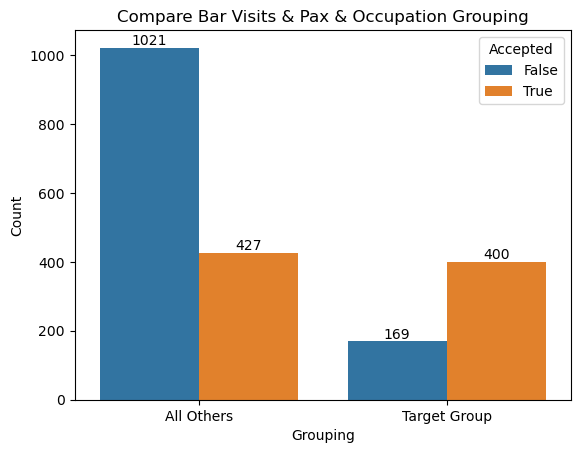

In [501]:
# df_bar['occupation'].value_counts()

def targetGroup(bar_visits, pax, occupation):
    
    if (# drivers who go to bars more than once a month
        bar_visits not in ['never', 'less1'] and 
        
        # had passengers that were not a kid
        pax not in ['Kid(s)'] and 
        
        # had occupations other than farming, fishing, or forestry
        occupation not in ['Farming Fishing & Forestry']):
        
        return 'Target Group'
    
    else: 
        return 'All Others'
    

df_bar['bar_visits & pax & occupation'] = df_bar[['Bar', 'passanger', 'occupation']].apply(lambda x: targetGroup(*x), axis=1)

fig = sns.countplot(df_bar, x='bar_visits & pax & occupation', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Compare Bar Visits & Pax & Occupation Grouping')
plt.xlabel('Grouping')
plt.ylabel('Count')

ct = pd.crosstab(df_bar['bar_visits & pax & occupation'], df_bar['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']
print('=====================================================================')
print(ct)
print('=====================================================================')

In [502]:
count = [427, 400]
nobs = [1448, 569]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 4.048403767614319e-63


### Analysis

#### Question
Compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not kids and had occupations other than farming, fishing, or forestry.

#### Answer

The acceptance rate of the target group is 70.29%
The acceptance rate of All Others is 29.48%.

The z-test above proves statistical significance.

### Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Accepted      False  True   Sum  Acceptance Rate
targetGroup                                     
All Others     1002   671  1673         0.401076
Target Group    188   156   344         0.453488


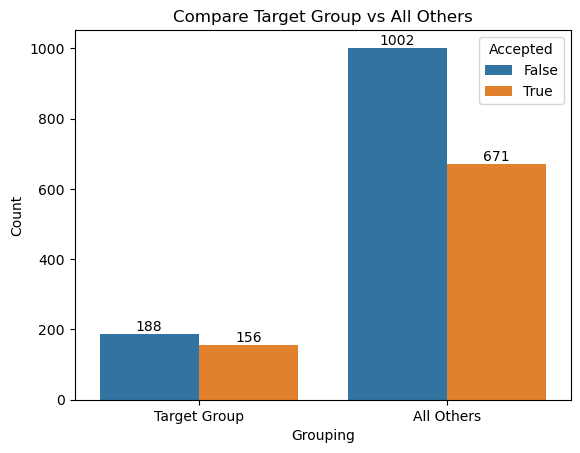

In [507]:
def targetGroup(Bar, passanger, maritalStatus, age, RestaurantLessThan20, income):
    if (
        # go to bars more than once a month
        bar_visits in ['1~3','4~8', 'gt8'] and 
        
        # had passengers that were not a kid
        passanger not in ['Kid(s)'] and 
        
        # were not widowed
        maritalStatus not in ['widowed']
    ) or (
        # go to bars more than once a month
        bar_visits in ['1~3','4~8', 'gt8'] and 
        
        # are under the age of 30
        age in ['below21', '21', '26']
    ) or (
        #go to cheap restaurants more than 4 times a month
        RestaurantLessThan20 in ['4~8', 'gt8'] and 
        
        # income is less than 50K
        income in ['Less than $12500', '$37500 - $49999', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
    ):
        return 'Target Group'
    else:
        return 'All Others'

df_bar['targetGroup'] = df_bar[['Bar', 'passanger', 'maritalStatus', 'age', 'RestaurantLessThan20', 'income']].apply(lambda x: targetGroup(*x), axis=1)

fig = sns.countplot(df_bar, x='targetGroup', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Compare Target Group vs All Others')
plt.xlabel('Grouping')
plt.ylabel('Count')

ct = pd.crosstab(df_bar['targetGroup'], df_bar['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']
print('=====================================================================')
print(ct)
print('=====================================================================')

In [504]:
count = [671, 156]
nobs = [1673, 344]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 0.07185020103763802


### Analysis

#### Question
Compare the acceptance rate between drivers who :

- go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
- go to bars more than once a month and are under the age of 30 OR
- go to cheap restaurants more than 4 times a month and income is less than 50K.

#### Answer

The acceptance rate of the bar coupon for the target group is 45.34%
The acceptance rate of the bar coupon for All Others is 40.10%.

TODO: Go into more detail here

The z-test above proves that his is NOT statistically significance.

## Conclusion reviewing Bar Coupons
Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The below are target groups that proved to accept the bar coupon more at a higher rate than all others. 

- passengers that visit bars more than 3 times a month - **73.18% Acceptance Rate**
- passengers that are 25+ and visit bars at least once a month - **69.52% Acceptance Rate**
- passengers that visit bars at least once a month, do not have kids and are not in an AGG type of job - **70.29% Acceptance Rate

Targeting these groups should yield a higher acceptance rate for the Bar coupon

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Overview of All Coupon Acceptance Rates

Y                             0         1       sum  Acceptance Rate
coupon                                                              
Bar                    0.093819  0.065200  0.159019         0.410015
Restaurant(20-50)      0.065752  0.051876  0.117629         0.441019
Coffee House           0.157758  0.157285  0.315043         0.499249
Restaurant(<20)        0.064333  0.155314  0.219647         0.707107
Carry out & Take away  0.049905  0.138757  0.188663         0.735478


Text(0, 0.5, 'Count')

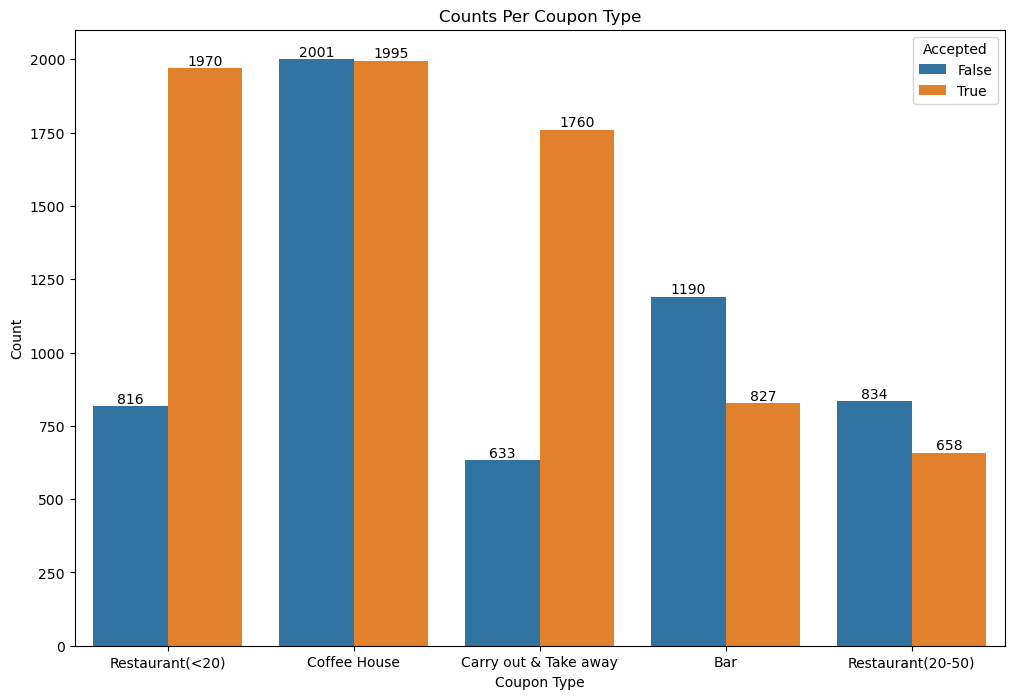

In [325]:
ct = pd.crosstab(data_cleaned['coupon'], data['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print('====================================================================')
print(ct.sort_values(by='Acceptance Rate'))
print('====================================================================')

plt.figure(figsize=(12,8))
fig = sns.countplot(data_cleaned, x='coupon', hue='Accepted')
fig.bar_label(container=fig.containers[0])
fig.bar_label(container=fig.containers[1])

plt.title('Counts Per Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')

From the data above, the coupon with the largest acceptance rate was the "Carry out & Take away" coupon with ~73% acceptance rate. The Bar coupon was the lowest with 41% acceptance rate. Lets look into the Restaurant(20-50), the second lowest performing coupon, with a ~44% acceptance rate to see if we can indentify the target audience.

### Reviewing Restaurant(20-50) Coupon (44% Acceptance Rate)

In [326]:
df_res_20_50 = data_cleaned.query('coupon == "Restaurant(20-50)"')
df_res_20_50.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accepted
7929,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(20-50),2h,Female,26,Single,...,less1,1~3,gt8,gt8,1,1,0,0,1,True
11712,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Female,50plus,Married partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,False
10374,Home,Alone,Sunny,80,10PM,Restaurant(20-50),1d,Female,26,Unmarried partner,...,less1,1~3,4~8,1~3,1,1,0,0,1,False
2328,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,31,Single,...,1~3,1~3,4~8,1~3,1,1,0,0,1,True
6724,Home,Kid(s),Snowy,30,10PM,Restaurant(20-50),2h,Female,31,Married partner,...,1~3,1~3,1~3,1~3,1,1,0,0,1,False
3704,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,26,Unmarried partner,...,1~3,less1,1~3,never,1,1,0,0,1,True
7470,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(20-50),1d,Female,31,Unmarried partner,...,never,less1,less1,never,1,0,0,0,1,True
12276,Home,Alone,Sunny,80,10PM,Restaurant(20-50),1d,Male,26,Single,...,gt8,4~8,4~8,4~8,1,0,0,0,1,True
11211,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,gt8,gt8,gt8,less1,1,0,0,1,0,False
10365,No Urgent Place,Partner,Sunny,80,2PM,Restaurant(20-50),1d,Female,26,Unmarried partner,...,less1,1~3,4~8,1~3,1,0,0,0,1,False


### Reviewing Age within Restaurant(20-50) Coupon

Accepted  False  True  Sum  Acceptance Rate
age                                        
50plus      143    79  222         0.355856
below21      37    26   63         0.412698
31          137    98  235         0.417021
21          167   131  298         0.439597
41           73    61  134         0.455224
36           88    78  166         0.469880
46           43    41   84         0.488095
26          146   144  290         0.496552


Text(0, 0.5, 'Count')

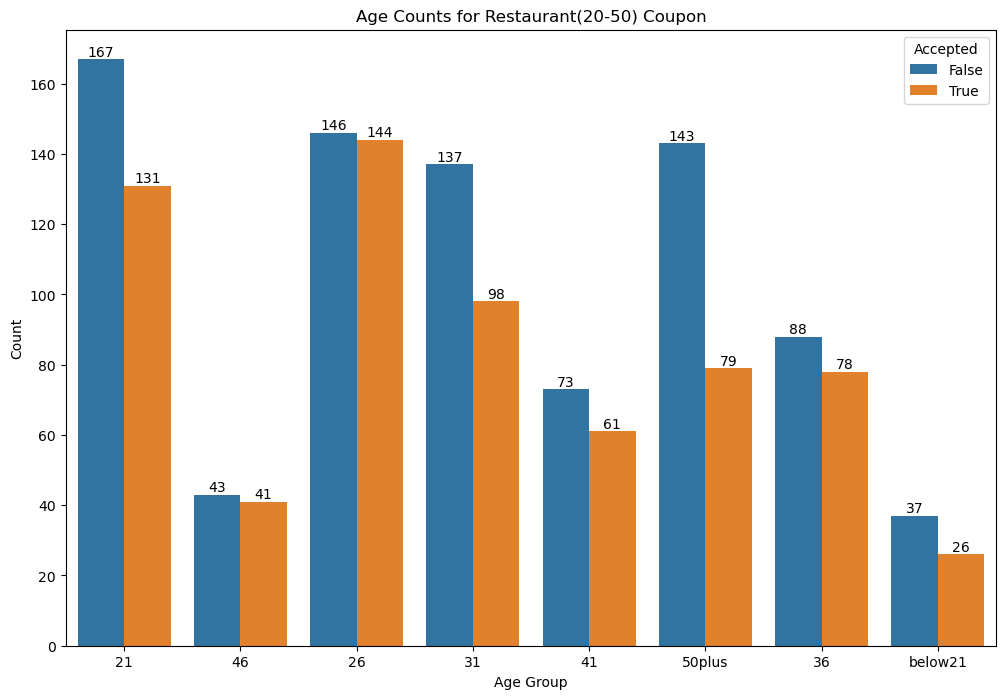

In [343]:
ct = pd.crosstab(df_res_20_50['age'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']
print('============================================================')
print(ct.sort_values(by='Acceptance Rate'))
print('============================================================')

plt.figure(figsize=(12,8))
fig = sns.countplot(df_res_20_50, x='age', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Age Counts for Restaurant(20-50) Coupon')
plt.xlabel('Age Group')
plt.ylabel('Count')

The above plot shows the age groups with the largest acceptance rate of the Resturant(20-50) coupon. 
Below lets group ages with an acceptance rate larger than 44%.

Accepted                False  True  Sum  Acceptance Rate
HighAcceptanceAgeGroup                                   
Other                     484   334  818         0.408313
26 - 46                   350   324  674         0.480712


Text(0, 0.5, 'Count')

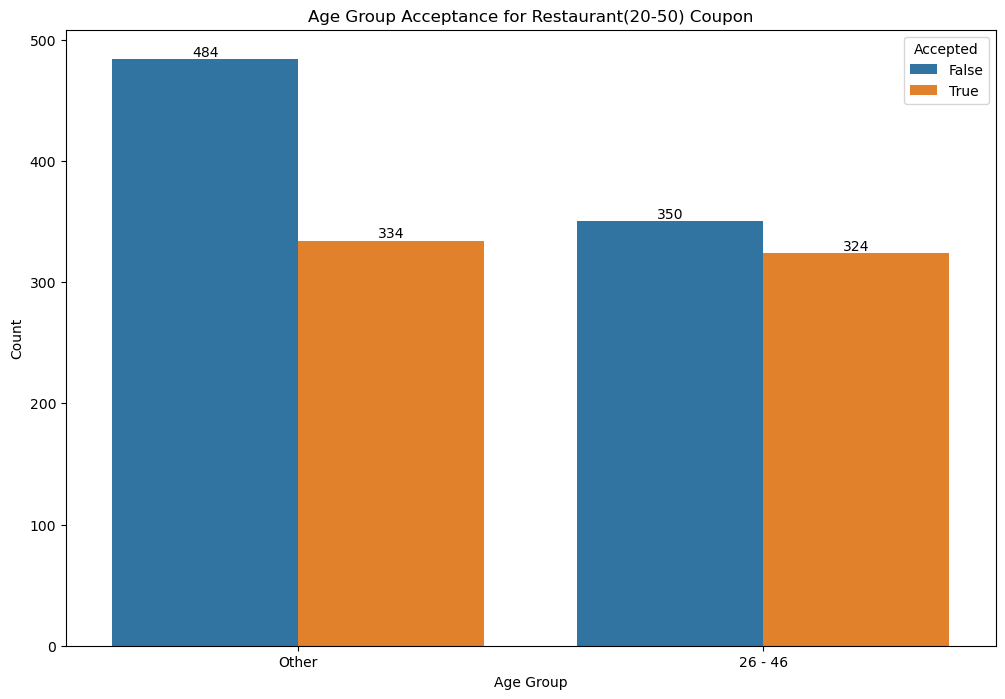

In [349]:
def groupAge(age):
    if age in ['26', '36', '41', '46']:
        return '26 - 46'
    else:
        return 'Other'

df_res_20_50['HighAcceptanceAgeGroup'] = df_res_20_50[['age']].apply(lambda x: groupAge(*x), axis=1)

ct = pd.crosstab(df_res_20_50['HighAcceptanceAgeGroup'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print('=============================================================')
print(ct.sort_values(by='Acceptance Rate'))
print('=============================================================')

plt.figure(figsize=(12,8))
fig = sns.countplot(df_res_20_50, x='HighAcceptanceAgeGroup', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Age Group Acceptance for Restaurant(20-50) Coupon')
plt.xlabel('Age Group')
plt.ylabel('Count')

From the observations, passengers between 26 and 46 years of age accepted the coupon at a ~48% acceptance rate.

### Reviewing MaritalStatus within Restaurant(20-50) Coupon

Accepted           False  True  Sum  Acceptance Rate
maritalStatus                                       
Widowed               13     4   17         0.235294
Divorced              40    22   62         0.354839
Married partner      358   257  615         0.417886
Single               306   263  569         0.462214
Unmarried partner    117   112  229         0.489083


Text(0, 0.5, 'Count')

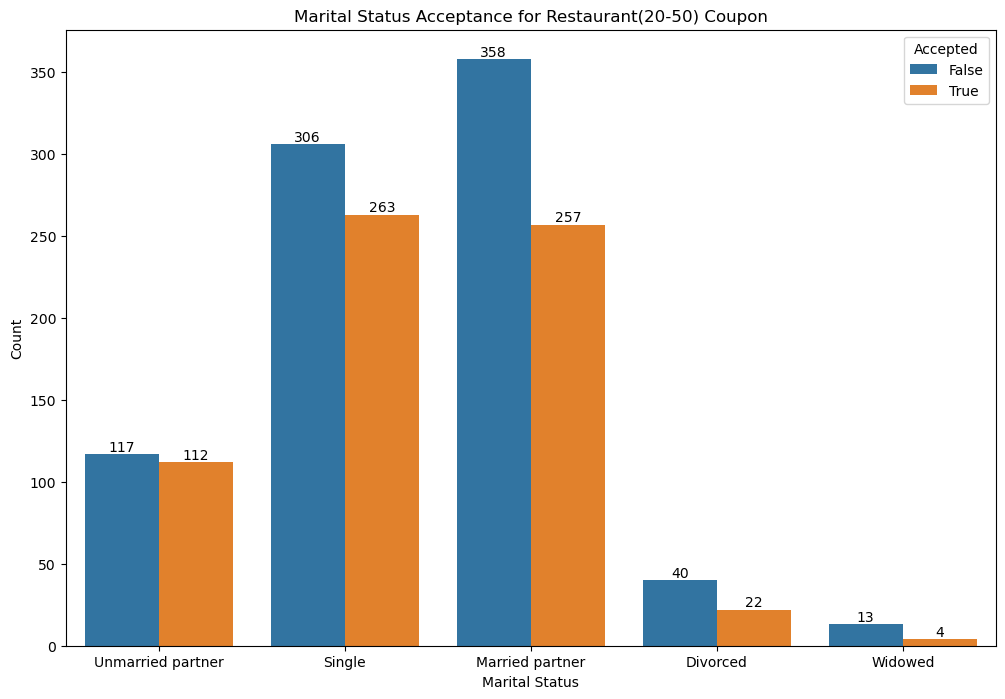

In [351]:
# df_res_20_50.info()
df_res_20_50['maritalStatus'].value_counts()

ct = pd.crosstab(df_res_20_50['maritalStatus'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print('=======================================================================')
print(ct.sort_values(by='Acceptance Rate'))
print('=======================================================================')


plt.figure(figsize=(12,8))
fig = sns.countplot(df_res_20_50, x='maritalStatus', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Marital Status Acceptance for Restaurant(20-50) Coupon')
plt.xlabel('Marital Status')
plt.ylabel('Count')

Accepted                             False      True       Sum  \
HighAcceptanceMaritalStatusGroup                                 
Other                             0.275469  0.189678  0.465147   
Single & Unmarried                0.283512  0.251340  0.534853   

Accepted                          Acceptance Rate  
HighAcceptanceMaritalStatusGroup                   
Other                                    0.407781  
Single & Unmarried                       0.469925  


Text(0, 0.5, 'Count')

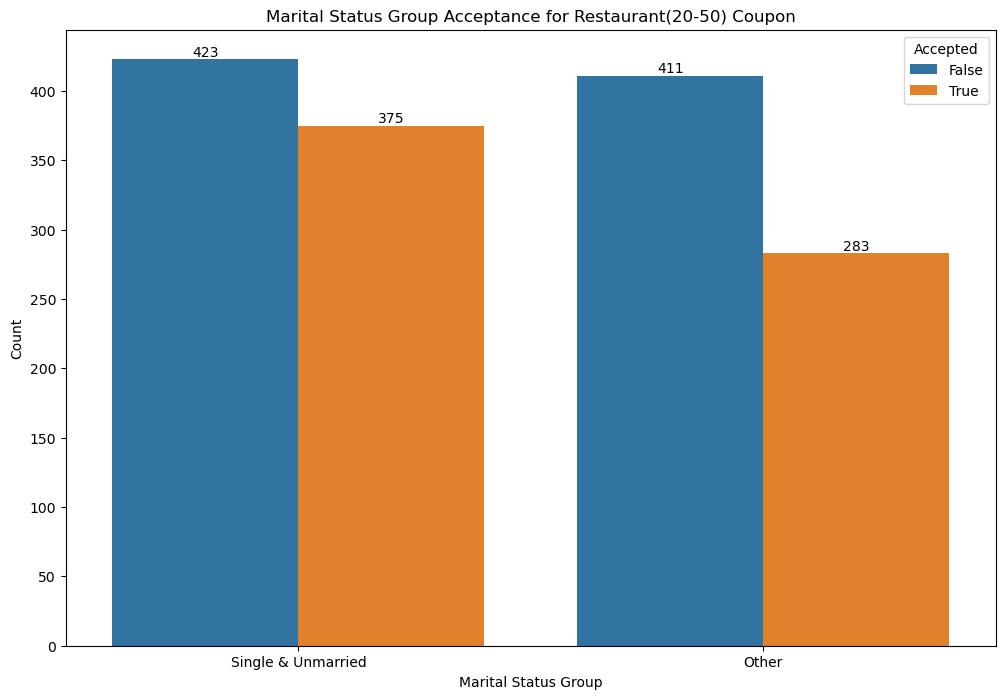

In [357]:
def groupMaritalStatus(maritalStatus):
    
    if maritalStatus in ['Unmarried partner','Single']:
        return 'Single & Unmarried'
    else:
        return 'Other'

df_res_20_50['HighAcceptanceMaritalStatusGroup'] = df_res_20_50[['maritalStatus']].apply(lambda x: groupMaritalStatus(*x), axis=1)

ct = pd.crosstab(df_res_20_50['HighAcceptanceMaritalStatusGroup'], df_res_20_50['Accepted'], normalize=True)
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print('=============================================================')
print(ct)
print('=============================================================')


plt.figure(figsize=(12,8))
fig = sns.countplot(df_res_20_50, x='HighAcceptanceMaritalStatusGroup', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Marital Status Group Acceptance for Restaurant(20-50) Coupon')
plt.xlabel('Marital Status Group')
plt.ylabel('Count')

From the observations, passengers that are single or have an unmarried partner accepted the coupon at a 47.3% acceptance rate, 3.3% higher than the total acceptance rate of the coupon.

In [ ]:
df_res_20_50.query('maritalStatus == "Married partner"').groupby('Y')[['occupation']].value_counts()

### Reviewing Income within Restaurant(20-50) Coupon

Accepted          False  True  Sum  Acceptance Rate
income                                             
Less than $12500     80    45  125         0.360000
$62500 - $74999      61    35   96         0.364583
$87500 - $99999      68    41  109         0.376147
$12500 - $24999     127    78  205         0.380488
$37500 - $49999     119    92  211         0.436019
$75000 - $87499      60    49  109         0.449541
$100000 or More     107   102  209         0.488038
$50000 - $62499     101   100  201         0.497512
$25000 - $37499     111   116  227         0.511013


Text(0, 0.5, 'Count')

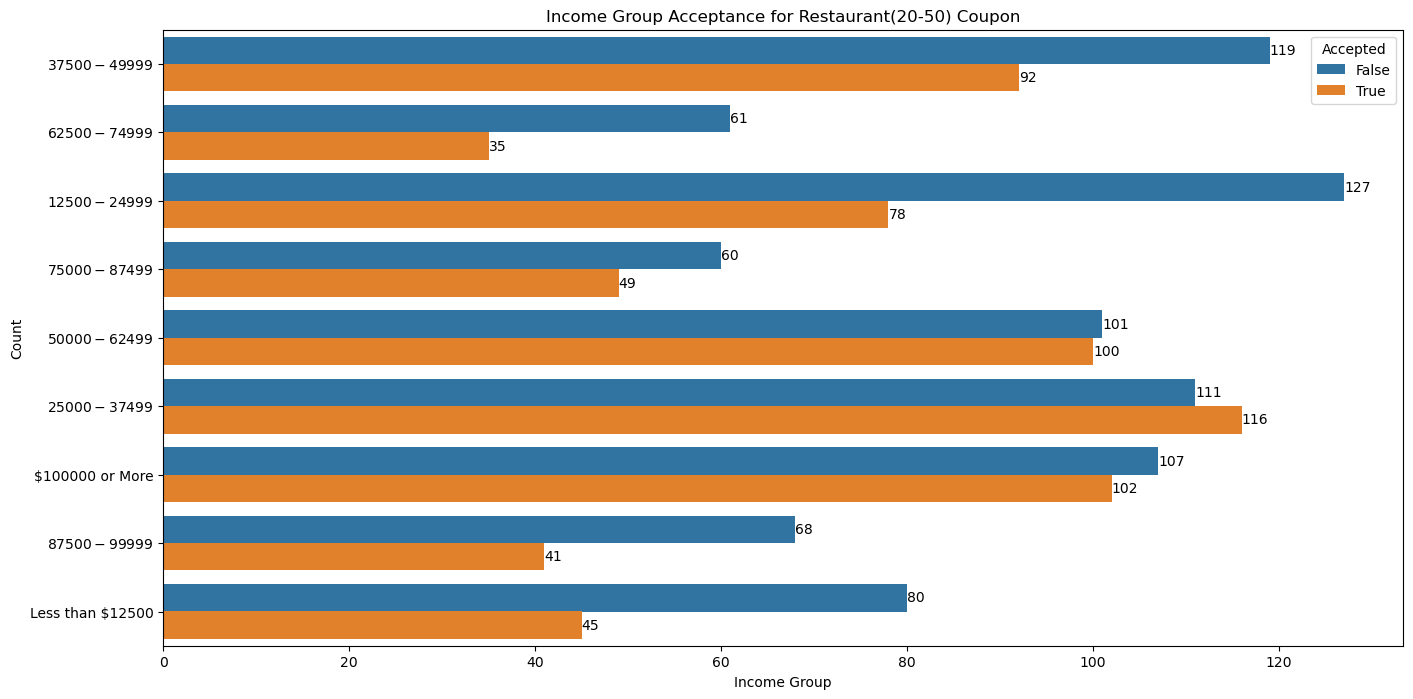

In [367]:
# df_res_20_50.info()
df_res_20_50['income'].value_counts()

ct = pd.crosstab(df_res_20_50['income'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print('==========================================================')
print(ct.sort_values(by='Acceptance Rate'))
print('==========================================================')

plt.figure(figsize=(16,8))
fig = sns.countplot(df_res_20_50, y='income', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Income Group Acceptance for Restaurant(20-50) Coupon')
plt.xlabel('Income Group')
plt.ylabel('Count')

Accepted                   False  True   Sum  Acceptance Rate
HighAcceptanceIncomeGroup                                    
25k - 37.5k                  111   116   227         0.511013
Other                        723   542  1265         0.428458


Text(0, 0.5, 'Count')

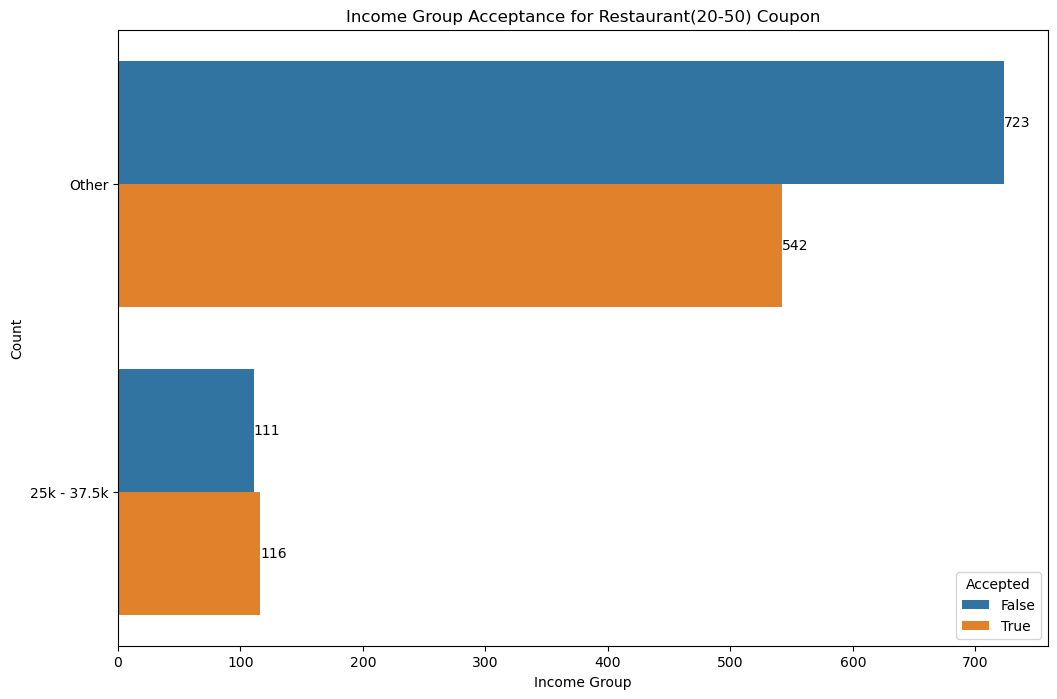

In [373]:
def groupIncome(income):
    if income in ['$25000 - $37499']:
        return '25k - 37.5k'
    else:
        return 'Other'

df_res_20_50['HighAcceptanceIncomeGroup'] = df_res_20_50[['income']].apply(lambda x: groupIncome(*x), axis=1)

ct = pd.crosstab(df_res_20_50['HighAcceptanceIncomeGroup'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct)

plt.figure(figsize=(12,8))
fig = sns.countplot(df_res_20_50, y='HighAcceptanceIncomeGroup', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Income Group Acceptance for Restaurant(20-50) Coupon')
plt.xlabel('Income Group')
plt.ylabel('Count')

### Reviewing Restaurant Visits within Restaurant(20-50) Coupon

In [124]:
# df_res_20_50.info()
df_res_20_50['Restaurant20To50'].value_counts()

ct = pd.crosstab(df_res_20_50['Restaurant20To50'], df_res_20_50['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print(ct.sort_values(by='Acceptance Rate'))
fig = px.bar(ct[[0,1]], barmode='group')
fig.update_layout(title='Coupon Type Acceptance By Restaurant20To50')
fig.update_xaxes(tickangle=90)
fig.show()

Y                        0         1       sum  Acceptance Rate
Restaurant20To50                                               
never             0.109386  0.046577  0.155963         0.298643
less1             0.292167  0.208186  0.500353         0.416079
1~3               0.123500  0.138320  0.261821         0.528302
4~8               0.021877  0.037403  0.059280         0.630952
gt8               0.007057  0.015526  0.022583         0.687500


The above plot shows the restaurant visitation groups with the largest acceptance rate of the Resturant(20-50) coupon. Below lets group the restaurant visitation groups with an acceptance rate larger than 44%.

In [128]:
def groupVisits(Restaurant20To50):
    return Restaurant20To50 in ['4~8', 'gt8']

df_res_20_50['HighAcceptanceRestaurant20To50Group'] = df_res_20_50[['Restaurant20To50']].apply(lambda x: groupVisits(*x), axis=1)

ct = pd.crosstab(df_res_20_50['HighAcceptanceRestaurant20To50Group'], df_res_20_50['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print(ct)
fig = px.bar(ct[[0,1]], barmode='group')
fig.update_layout(title='Coupon Type Acceptance by Specific Restaurant20To50 Groups')
fig.show()

Y                                           0         1       sum  \
HighAcceptanceRestaurant20To50Group                                 
False                                0.525053  0.393084  0.918137   
True                                 0.028934  0.052929  0.081863   

Y                                    Acceptance Rate  
HighAcceptanceRestaurant20To50Group                   
False                                       0.428132  
True                                        0.646552  


Targeting passengars that visit these restuarants more than 4 times a month yeilds a 64% acceptance rate, 20% higher than the overall acceptance rate of the coupon.

### Reviewing Enroute Data within Restaurant(20-50) Coupon

In [146]:
# df_res_20_50.info()

ct5 = pd.crosstab(df_res_20_50['toCoupon_GEQ5min'], df_res_20_50['Y'])
ct5['sum'] = ct5[0] + ct5[1]
ct5['Acceptance Rate'] = ct5[1] / ct5['sum']

ct15 = pd.crosstab(df_res_20_50['toCoupon_GEQ15min'], df_res_20_50['Y'])
ct15['sum'] = ct15[0] + ct15[1]
ct15['Acceptance Rate'] = ct15[1] / ct15['sum']

ct25 = pd.crosstab(df_res_20_50['toCoupon_GEQ25min'], df_res_20_50['Y'])
ct25['sum'] = ct25[0] + ct25[1]
ct25['Acceptance Rate'] = ct25[1] / ct25['sum']

ctSame = pd.crosstab(df_res_20_50['direction_same'], df_res_20_50['Y'])
ctSame['sum'] = ctSame[0] + ctSame[1]
ctSame['Acceptance Rate'] = ctSame[1] / ctSame['sum']

ctOpp = pd.crosstab(df_res_20_50['direction_opp'], df_res_20_50['Y'])
ctOpp['sum'] = ctOpp[0] + ctOpp[1]
ctOpp['Acceptance Rate'] = ctOpp[1] / ctOpp['sum']

# TODO: Add destination data to this

print(ct5)
print(ct15)
print(ct25)
print(ctSame)
print(ctOpp)

Y                   0    1   sum  Acceptance Rate
toCoupon_GEQ5min                                 
1                 785  632  1417         0.446013
Y                    0    1  sum  Acceptance Rate
toCoupon_GEQ15min                                
0                  282  238  520         0.457692
1                  503  394  897         0.439242
Y                    0    1   sum  Acceptance Rate
toCoupon_GEQ25min                                 
0                  722  584  1306         0.447167
1                   63   48   111         0.432432
Y                 0    1   sum  Acceptance Rate
direction_same                                 
0               658  518  1176         0.440476
1               127  114   241         0.473029
Y                0    1   sum  Acceptance Rate
direction_opp                                 
0              127  114   241         0.473029
1              658  518  1176         0.440476


### Grouping and Identifying a Target Audience

In [167]:
def Target(Restaurant20To50, age, income, maritalStatus):
    # Target passengers that visit more than 4 times a month and are between 26 and 46 years of age
    if (age in ['36', '46', '26'] and Restaurant20To50 in ['4~8', 'gt8']):
        return 'TargetGroup1'
    
    # Target passengers that are single and make between 25k and 37.5k
    if (income in ['$25000 - $37499'] and maritalStatus in ['Single']):
        return 'TargetGroup2'
    
    return 'other'

df_res_20_50['TargetGroup'] = df_res_20_50[['Restaurant20To50', 'age', 'income', 'maritalStatus']].apply(lambda x: Target(*x), axis=1)

ct = pd.crosstab(df_res_20_50['TargetGroup'], df_res_20_50['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print(ct)
fig = px.bar(ct[[0,1]], barmode='group')
fig.update_layout(title='Coupon Type Acceptance by Specific Target Groups')
fig.show()

Y                    0         1       sum  Acceptance Rate
TargetGroup                                                
TargetGroup1  0.006351  0.024700  0.031052         0.795455
TargetGroup2  0.028229  0.039520  0.067749         0.583333
other         0.519407  0.381793  0.901200         0.423649


In [153]:
df_res_20_50.query('TargetGroup != "TargetVisits&Age"')[['income']].value_counts(normalize=True)

income          
$25000 - $37499     0.152950
$100000 or More     0.142753
$50000 - $62499     0.139111
$12500 - $24999     0.134741
$37500 - $49999     0.130371
Less than $12500    0.083030
$75000 - $87499     0.074290
$87500 - $99999     0.072833
$62500 - $74999     0.069920
dtype: float64